In [1]:
import pandas as pd
from os import environ


In [2]:
import keras

Using TensorFlow backend.


## 原始資料來源的 SQL，這是抽樣過的資料，當中也有一筆資料是修改過的，因為當天 Server 似乎出了一些問題，導至流量大幅下降


In [326]:
sql="""SELECT
  date , sum(clicks) as cc 
FROM
  TABLE_DATE_RANGE(grouptargeting.search_console_, TIMESTAMP('2016-01-01'), TIMESTAMP('2017-10-31'))
where keyword like '%日本%' or keyword like '%東京%' or keyword like '%大阪%' or keyword like '%關西%' 
group by date
order by date"""


# sql="""
# SELECT
#   date , sum(clicks) as cc 
# FROM
# (
# select keyword ,(INTEGER(date/100)*100+1) as date,clicks from
#   TABLE_DATE_RANGE(grouptargeting.search_console_, TIMESTAMP('2016-01-01'), CURRENT_TIMESTAMP())
# )
  
#   where keyword like '%訂票%' 
# group by date
# order by date ,cc desc

# """

In [327]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.dates as mdates

%matplotlib notebook

# %matplotlib inline  

# load dataset
def parser(x):
    return datetime.strptime(x, '%Y%m%d')

series = pd.read_gbq(sql,project_id=environ['PROJECT_ID'], verbose=False, private_key=environ['GOOGLE_KEY'])#,header=0, parse_dates=[0], index_col='date', squeeze=True, date_parser=parser)
series['date'] = pd.to_datetime(series['date'],format='%Y%m%d')
series.index = series['date']
del series['date']

# summarize first few rows
print(series.head())


Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ImportError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ImportError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ImportError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (

               cc
date             
2016-01-01  29331
2016-01-02  33816
2016-01-03  37319
2016-01-04  36548
2016-01-05  37090


<IPython.core.display.Javascript object>


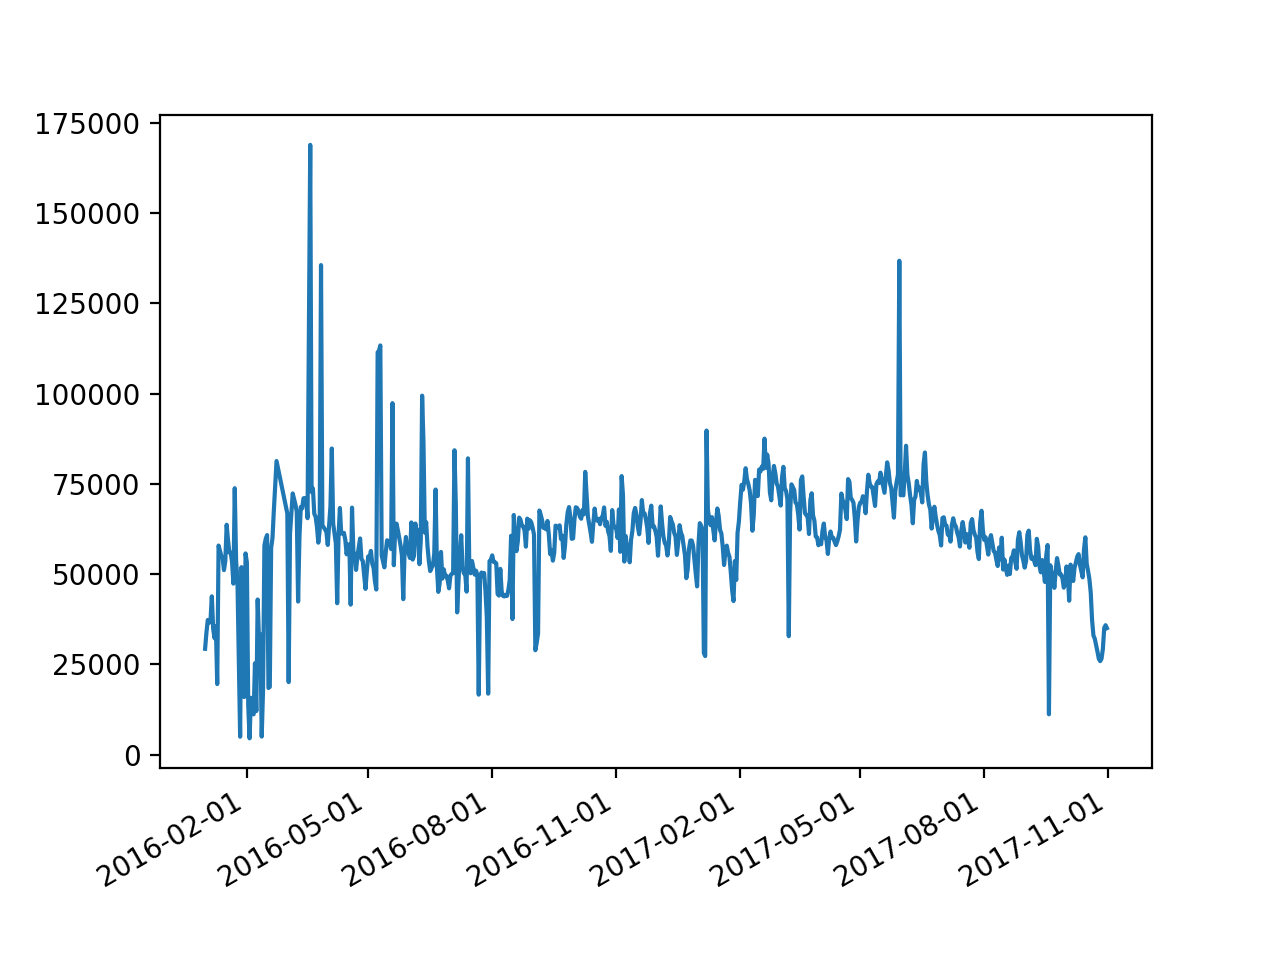

In [328]:
fig, ax = pyplot.subplots(1)
fig.autofmt_xdate()
pyplot.plot(series)
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
pyplot.show()


## 為什麼 2017/1/3 流量跳起來
* https://info.dingtaxi.com/zhtw/2017/01/2017chinese_new_year_tickets_info/

In [329]:
sql="""SELECT
  date,keyword , sum(clicks) as cc 
FROM
  TABLE_DATE_RANGE(grouptargeting.search_console_, TIMESTAMP('2016-01-01'), CURRENT_TIMESTAMP())
where keyword like '%訂票%' and date = 20170103
group by date,keyword
order by date ,cc desc"""
pd.read_gbq(sql,project_id=environ['PROJECT_ID'], verbose=True, private_key=environ['GOOGLE_KEY'])

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ImportError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ImportError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ImportError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (

Requesting query... ok.
Job ID: job_tMlU5lbFtZvEUS3r_JiAKALqFKZV
Query running...
Query done.
Cache hit.

Retrieving results...
Got 455 rows.

Total time taken 2.34 s.
Finished at 2017-11-18 04:57:34.


,date,keyword,cc
0,20170103,台鐵春節訂票時間2017,291
1,20170103,台鐵過年訂票2017,52
2,20170103,台鐵春節訂票,51
3,20170103,台鐵 春節 訂票 2017,49
4,20170103,春節火車訂票2017,48
5,20170103,吉卜力美術館訂票,47
6,20170103,濟州航空訂票教學,28
7,20170103,濟州航空 訂票,26
8,20170103,台鐵春節訂票2017,25
9,20170103,濟州航空 訂票教學,24


## 進行 scale to 0-1 ，方便作為 input 及 output (因為 sigmoid 介於 0~1 之間)

In [330]:
from sklearn.preprocessing import scale,MinMaxScaler
scaler = MinMaxScaler()

In [331]:
x = series.values

In [332]:
x = x.reshape([x.shape[0],1])

In [333]:
scaler.fit(x)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [334]:
x_scaled = scaler.transform(x)

<IPython.core.display.Javascript object>


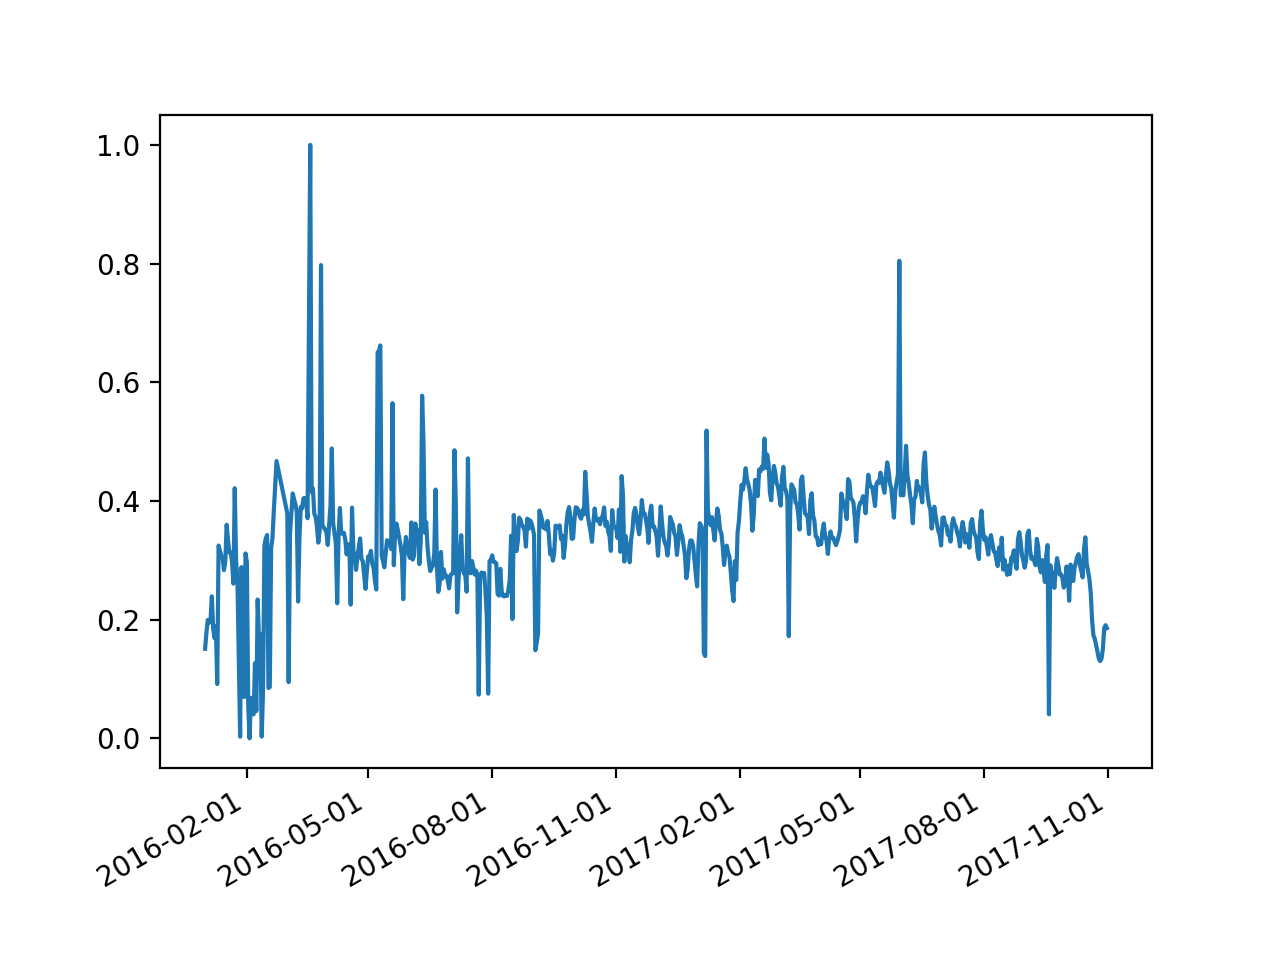

In [335]:
fig, ax = pyplot.subplots(1)
fig.autofmt_xdate()
pyplot.plot(series.index,x_scaled)
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
pyplot.show()



## 產生 x,y pair 
* 舉列來說假設將 Step Size 設為 4 天，故一筆 Training Data ，為連續 4 天的流量。再來利用這４天的資料來預測第 5 天的流量
* 綠色的部是 Training Data(前4天的資料)，藍色的部份是需要被預測的部份。示意如下圖
* <img align="left" width="50%" src="./imgs/sequence_uv.png" />

In [336]:
#往回看 30 天前的每一筆資料
step_size = 15

In [337]:
date_list = series.index
date_list = date_list[step_size-1:-1]


In [338]:
print("原始資料長度:{}".format(x_scaled.shape))

原始資料長度:(659, 1)


In [339]:
def window_stack(a, stepsize=1, width=3):
    return np.hstack( a[i:1+i-width or None:stepsize] for i in range(0,width) )

import numpy as np
train_x = window_stack(x_scaled, stepsize=1, width=step_size)

In [340]:
# 最後一筆資料要放棄，因為沒有未來的答案作驗證

train_x = train_x[:-1]
train_x.shape

(644, 15)

In [341]:
# 請注意千萬不將每一筆(Row) 當中的最後一天資料作為 Training Data 中的 Input Data
train_y = np.array([i for i in x_scaled[step_size:]]) 

## 確認產出來的 Training Data 沒有包含到 Testing Data

In [342]:
train_y.shape

(644, 1)

In [343]:
train_x[0]

array([ 0.15089805,  0.17818638,  0.19949987,  0.19480883,  0.19810655,
        0.23921244,  0.18453236,  0.16873129,  0.18871839,  0.09144783,
        0.32480104,  0.31651415,  0.30774051,  0.30362749,  0.28347611])

In [344]:
train_x[1]

array([ 0.17818638,  0.19949987,  0.19480883,  0.19810655,  0.23921244,
        0.18453236,  0.16873129,  0.18871839,  0.09144783,  0.32480104,
        0.31651415,  0.30774051,  0.30362749,  0.28347611,  0.29874784])

In [345]:
train_y[0]

array([ 0.29874784])

## Design Graph

In [346]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(train_x, (train_x.shape[0], step_size, 1))

In [347]:
from keras import Sequential
from keras.layers import LSTM,Dense
# create and fit the LSTM network
model = Sequential()
# input_shape(step_size,feature_dim)
model.add(LSTM(100, input_shape=(step_size,1), unroll=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


## 最後60天的筆資料不要看

In [348]:
validation_size = 60
val_loss = []
loss = []

In [ ]:

for _ in range(500):
    history = model.fit(trainX[:-1*validation_size],
              train_y[:-1*validation_size],
              epochs=1,shuffle=False, 
              validation_data=(trainX[-1*validation_size:],
              train_y[-1*validation_size:]))
    
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
    model.reset_states()

Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 2s 4ms/step - loss: 0.0293 - acc: 0.0017 - val_loss: 0.0030 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 618us/step - loss: 0.0073 - acc: 0.0017 - val_loss: 0.0088 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 601us/step - loss: 0.0065 - acc: 0.0017 - val_loss: 0.0048 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 588us/step - loss: 0.0056 - acc: 0.0017 - val_loss: 0.0050 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 597us/step - loss: 0.0056 - acc: 0.0017 - val_loss: 0.0055 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [============================

584/584 [==============================] - 0s 571us/step - loss: 0.0052 - acc: 0.0017 - val_loss: 0.0039 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 556us/step - loss: 0.0052 - acc: 0.0017 - val_loss: 0.0039 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 564us/step - loss: 0.0052 - acc: 0.0017 - val_loss: 0.0039 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 566us/step - loss: 0.0052 - acc: 0.0017 - val_loss: 0.0038 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 562us/step - loss: 0.0052 - acc: 0.0017 - val_loss: 0.0038 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 575us/step - loss: 0.0052 - acc: 0.0017 - va

584/584 [==============================] - 0s 530us/step - loss: 0.0047 - acc: 0.0017 - val_loss: 0.0038 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 540us/step - loss: 0.0047 - acc: 0.0017 - val_loss: 0.0030 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 547us/step - loss: 0.0047 - acc: 0.0017 - val_loss: 0.0035 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 534us/step - loss: 0.0047 - acc: 0.0017 - val_loss: 0.0034 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 537us/step - loss: 0.0047 - acc: 0.0017 - val_loss: 0.0031 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 540us/step - loss: 0.0047 - acc: 0.0017 - va

584/584 [==============================] - 0s 541us/step - loss: 0.0043 - acc: 0.0017 - val_loss: 0.0027 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 554us/step - loss: 0.0042 - acc: 0.0017 - val_loss: 0.0029 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 538us/step - loss: 0.0043 - acc: 0.0017 - val_loss: 0.0026 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 545us/step - loss: 0.0042 - acc: 0.0017 - val_loss: 0.0029 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 547us/step - loss: 0.0043 - acc: 0.0017 - val_loss: 0.0026 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 533us/step - loss: 0.0042 - acc: 0.0017 - va

584/584 [==============================] - 0s 562us/step - loss: 0.0038 - acc: 0.0017 - val_loss: 0.0027 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 562us/step - loss: 0.0038 - acc: 0.0017 - val_loss: 0.0024 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 559us/step - loss: 0.0038 - acc: 0.0017 - val_loss: 0.0029 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 561us/step - loss: 0.0039 - acc: 0.0017 - val_loss: 0.0024 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 567us/step - loss: 0.0039 - acc: 0.0017 - val_loss: 0.0028 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 557us/step - loss: 0.0039 - acc: 0.0017 - va

584/584 [==============================] - 0s 546us/step - loss: 0.0037 - acc: 0.0017 - val_loss: 0.0025 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 537us/step - loss: 0.0037 - acc: 0.0017 - val_loss: 0.0027 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 535us/step - loss: 0.0037 - acc: 0.0017 - val_loss: 0.0026 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 541us/step - loss: 0.0037 - acc: 0.0017 - val_loss: 0.0028 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 528us/step - loss: 0.0037 - acc: 0.0017 - val_loss: 0.0026 - val_acc: 0.0000e+00
Train on 584 samples, validate on 60 samples
Epoch 1/1
584/584 [==============================] - 0s 537us/step - loss: 0.0037 - acc: 0.0017 - va

## 看一下 Error Rate 曲線

<IPython.core.display.Javascript object>


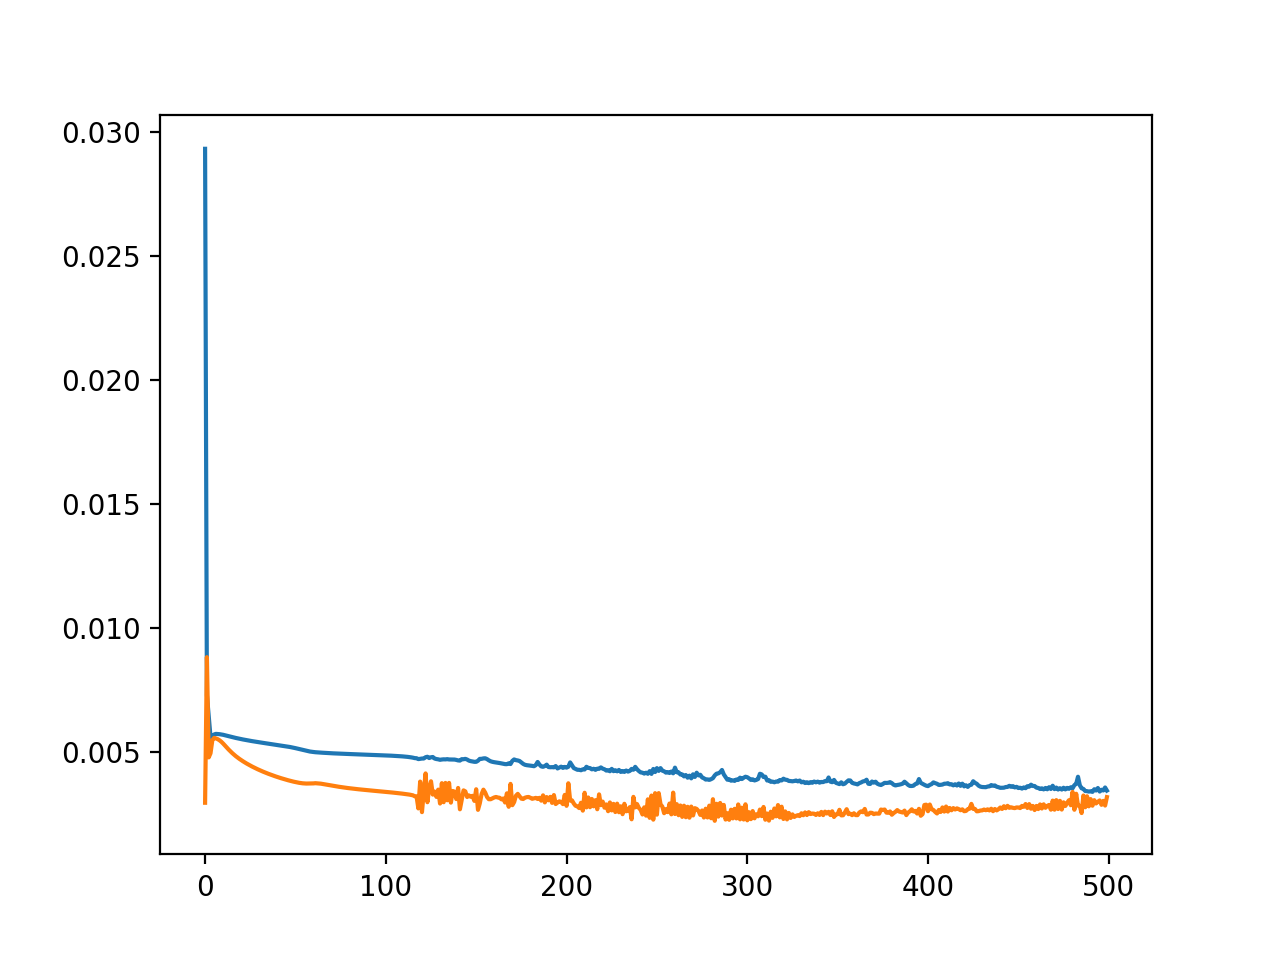

In [357]:
pyplot.figure()

pyplot.plot(loss)
pyplot.plot(val_loss)
pyplot.show()

# 看一下曲線擬合效果

In [358]:
predict_y = model.predict(trainX)

<IPython.core.display.Javascript object>


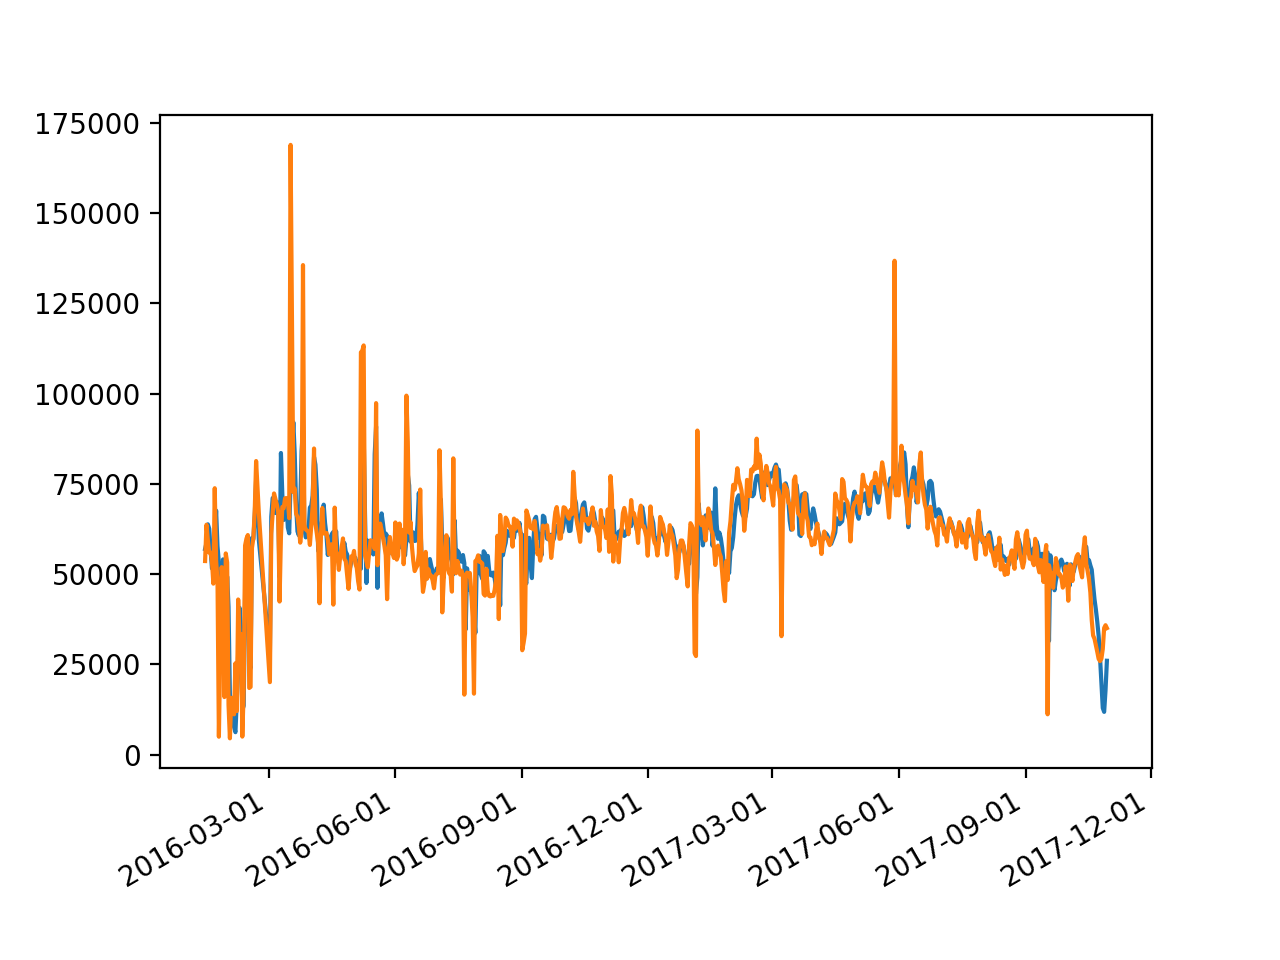

In [359]:
fig, ax = pyplot.subplots(1)
fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)


pyplot.plot(date_list, scaler.inverse_transform(predict_y))
pyplot.plot(date_list, scaler.inverse_transform(train_y))


pyplot.show()

## 來預測最後 60 天資料預出來的結果

In [360]:
predict_y = model.predict(trainX[-1*validation_size:])

In [361]:
predict_y = scaler.inverse_transform(predict_y)

In [362]:
predict_y.shape

(60, 1)

<IPython.core.display.Javascript object>


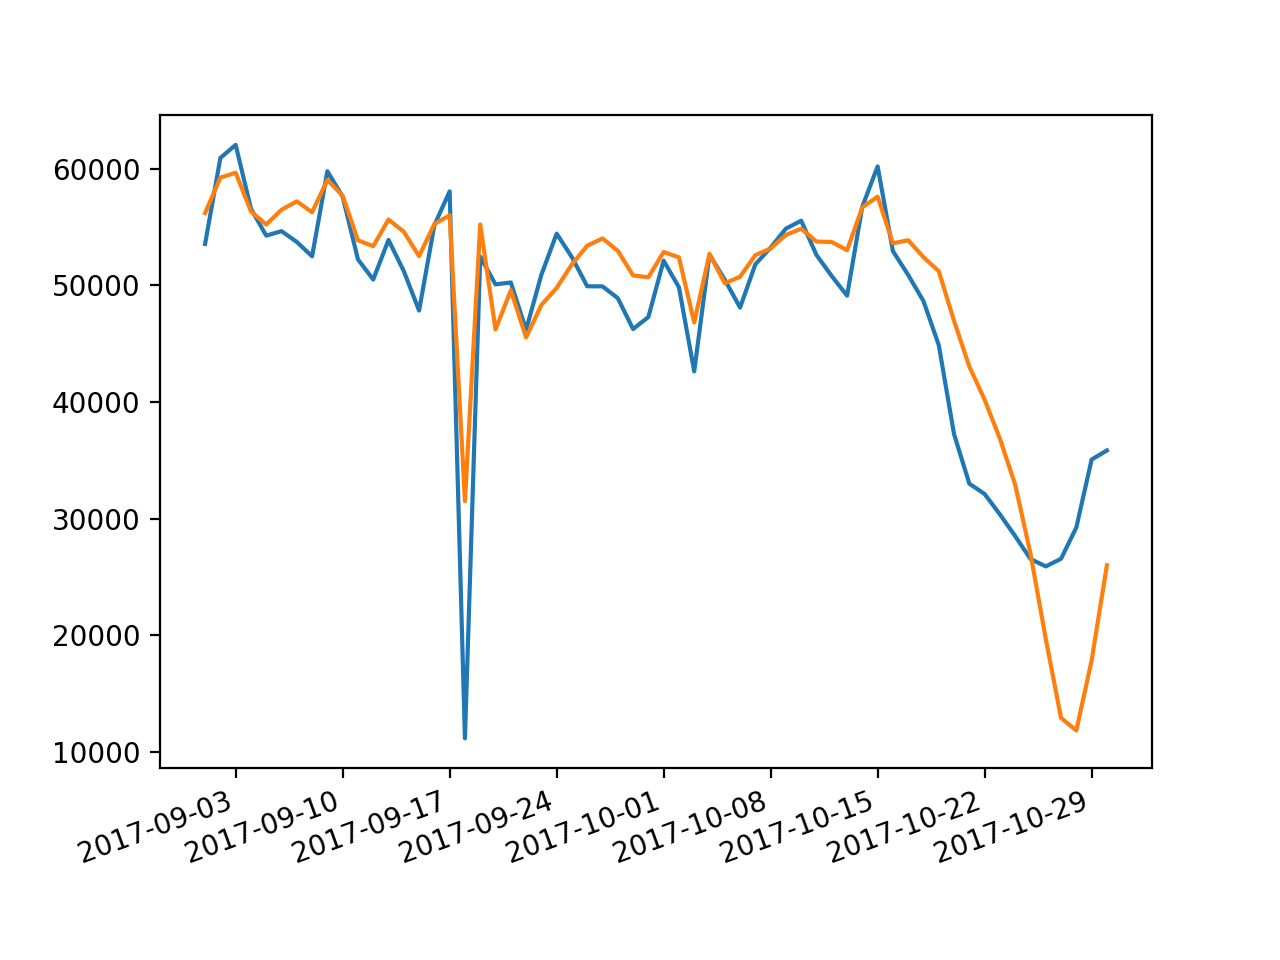

In [363]:
fig, ax = pyplot.subplots(1)
fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)

pyplot.plot(date_list[-60:],x[-1*(validation_size+1):-1])
pyplot.plot(date_list[-60:],predict_y)
pyplot.xticks(rotation=20)

pyplot.show()

## 來預測接下來 N 天的結果

In [364]:
hiistory_y = []
for i in range(60):
    s = (60-i)*-1
    e = (60-i)*-1 + 1
    if len(hiistory_y) > 0 :
        new_x = trainX[i].reshape(15).tolist()
        new_x[-1] = hiistory_y[-1]
        new_x = np.array(new_x)
        new_x = new_x.reshape([1,15,1])
        new_y = model.predict(new_x).reshape(1).tolist()[0]
    else:
        new_y = model.predict(trainX[s:e]).reshape(1).tolist()[0]
        
    hiistory_y.append(new_y)
        


<IPython.core.display.Javascript object>


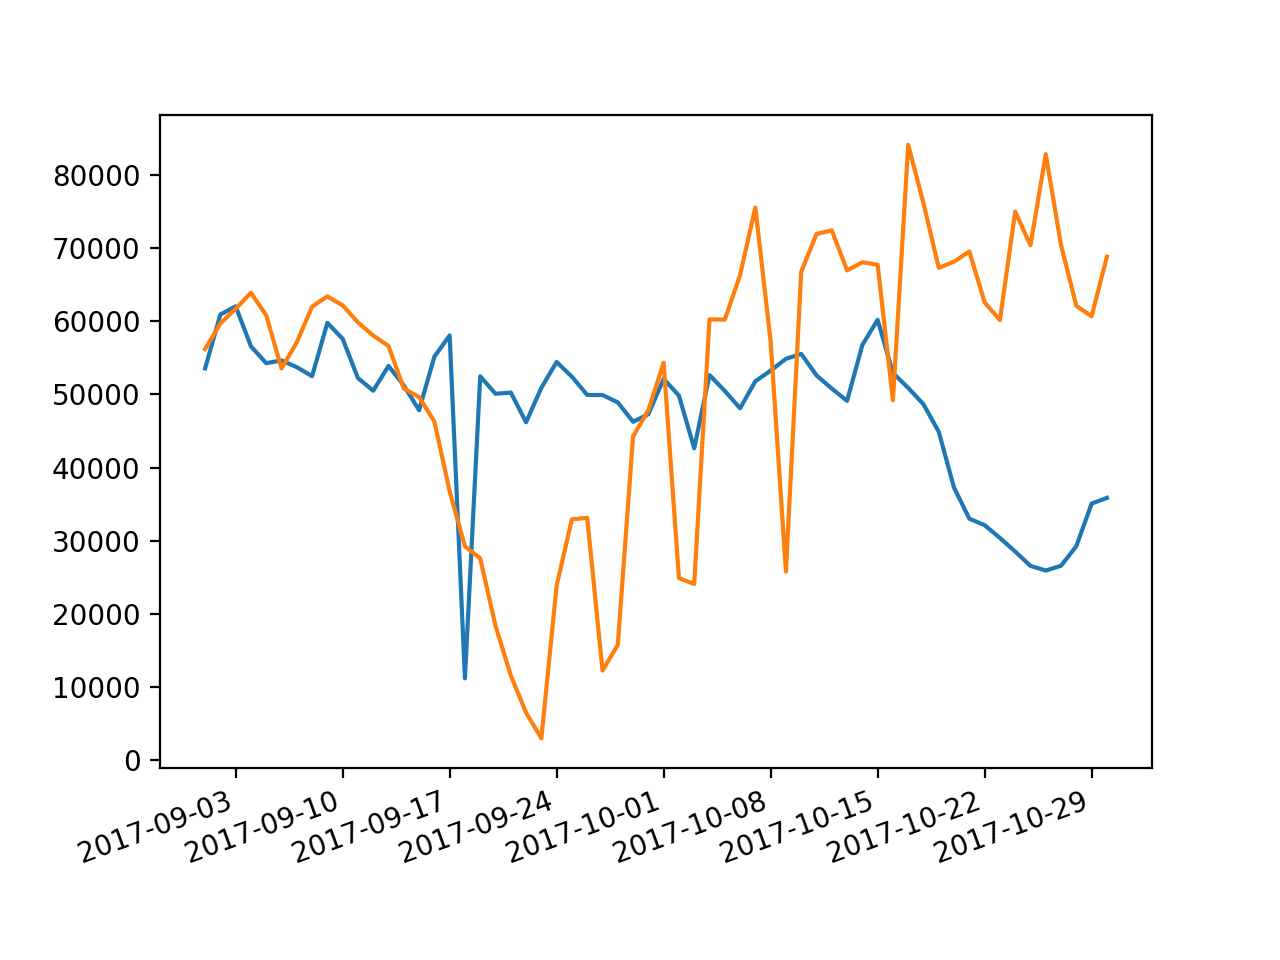

In [365]:
fig, ax = pyplot.subplots(1)
fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)

pyplot.plot(date_list[-60:],x[-1*(validation_size+1):-1])


hiistory_y = scaler.inverse_transform([hiistory_y]).reshape([60])

pyplot.plot(date_list[-60:],hiistory_y)
pyplot.xticks(rotation=20)

pyplot.show()

## 心得觀察
* LSTM 可以學習到 Period Pattern 是沒有問題的，但是似乎對於大幅的震盪以目前的 Model 來說無法完全的 Catch 到，但是還是有學到漲幅的趨勢預測
* 至於 LSTM 要如何調整震盪的幅度有兩個想法可以實驗看看
 * 直接 Modified Training，將震盪幅度加大
 * 修改 Loss Function ，把平方改為 2.x 次方不知道是否有效果